In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os
os.path.abspath("")

'C:\\Users\\Keval Shah\\My Python Stuff\\Compute DA ML'

In [8]:
df = pd.read_csv('data.csv')

In [9]:
df.head(3)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [41]:
df = df.drop('Unnamed: 0',axis=1)

In [42]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [12]:
df.shape

(2017, 17)

In [13]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


"Instrumentalness" quantifies the degree to which a song or audio track contains vocals or lyrics versus purely instrumental content. 

It's metric value is between 0 and 1, where:

--> 0 indicates that the track is likely to be purely instrumental (no vocals or lyrics).


--> 1 indicates that the track is likely to be entirely vocal or contain lyrics with no instrumental components.

In other words, the closer the value is to 0, the more instrumental the track is, while a value closer to 1 suggests a track with vocals or lyrics.

In [14]:
df_inst = df.sort_values('instrumentalness',ascending=False)[['instrumentalness','song_title', 'artist']]
df_inst.head(10)

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


# Tempo in music is the speed or pace of a composition, measured in beats per minute (BPM).It indicates how slow or fast the music should be played to convey a feeling or set the mood. 

In [15]:
top_artists = df['artist'].value_counts().head(10).index.tolist()
#top_artists.head(10)

In [16]:
# to create columns for our new df
artist_df = pd.DataFrame(columns=['Artist','Avg_tempo'])
artist_df.head()

,Artist,Avg_tempo


In [17]:
for artist in top_artists:
    artist_tempo = df[df['artist'] == artist]['tempo']
    avg_tempo = artist_tempo.mean()
    temp_df = pd.DataFrame({'Artist': [artist], 'Avg_tempo': [avg_tempo]})
    artist_df = pd.concat([artist_df, temp_df], ignore_index=True)

In [18]:
df_avg_tempo_of_artist = artist_df.head(10).sort_values(by='Avg_tempo',ascending=False)
df_result = df_avg_tempo_of_artist.reset_index(drop=True)

In [19]:
df_result

,Artist,Avg_tempo
0,FIDLAR,145.983444
1,WALK THE MOON,136.163600
2,Fall Out Boy,133.815625
3,Skrillex,132.454125
4,Future,128.989625
5,Crystal Castles,128.600778
6,Disclosure,128.118417
7,Backstreet Boys,113.066600
8,Drake,112.406750
9,Rick Ross,110.721923


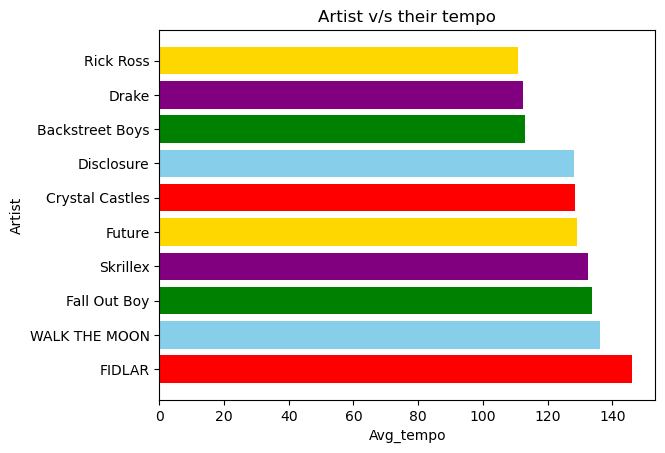

In [38]:
Artist=df_result['Artist']
Avg_tempo = df_result['Avg_tempo']
colors=['red','skyblue','green','purple','gold']
plt.barh(Artist,Avg_tempo,color=colors)
plt.title('Artist v/s their tempo')
plt.xlabel('Avg_tempo')
plt.ylabel('Artist')
plt.show()

# We can find the artists whose songs ranges 'Energy' more than 0.4. This will be helpful for people loving high enegertic songs.



In [51]:
df_Energy = df[df['energy']>0.4][['energy','song_title','artist']].head(10).sort_values(by='energy',ascending=False).reset_index(drop=True)
df_Energy

,energy,song_title,artist
0,0.944,I've Seen Footage,Death Grips
1,0.855,Subways - In Flagranti Extended Edit,The Avalanches
2,0.748,Donme Dolap - Baris K Edit,Modern Folk Üçlüsü
3,0.603,Digital Animal,Honey Claws
4,0.561,Parallel Lines,Junior Boys
5,0.560,Sneakin’,Drake
6,0.472,Childs Play,Drake
7,0.434,Mask Off,Future
8,0.434,Cemalim,Erkin Koray
9,0.412,Xanny Family,Future


# We can also find the fastest songs with duration_ms value less than 300000 ms (300 s).People who are fond of fast songs would enjoy this.

In [ ]:
df_fastest = df[df['duration_ms']< 300000].sort_values(by='tempo', ascending=False).head(10)[['duration_ms','tempo','song_title','artist']]
df_fastest

Text(0.5, 1.0, 'Artists with most songs')

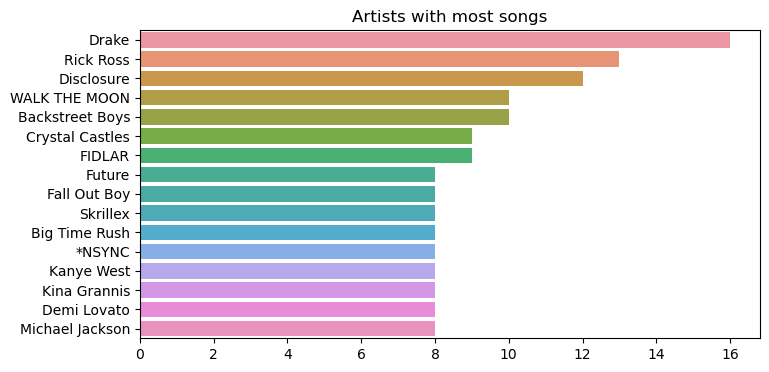

In [33]:
fig , axes = plt.subplots(1,1,figsize=(8,4))
top_artist_count = df.artist.value_counts()
sns.barplot(x = top_artist_count[:16].values, y= top_artist_count[:16].index, ax = axes)
plt.title('Artists with most songs')

# We can also find the songs of singer 'Drake' which are more enegertic and have energy values more than 0.5

In [25]:
Drake = df[(df['artist']=='Drake') & (df['energy']>0.5)][['energy','song_title']]
Drake.sort_values('energy',ascending=False).reset_index(drop=True)

,energy,song_title
0,0.861,Best I Ever Had
1,0.822,Skepta Interlude
2,0.709,0 To 100 / The Catch Up
3,0.676,Big Rings
4,0.623,Hotline Bling
5,0.571,Headlines
6,0.560,Sneakin’
7,0.547,Jumpman
8,0.531,Started From the Bottom
9,0.527,Take Care


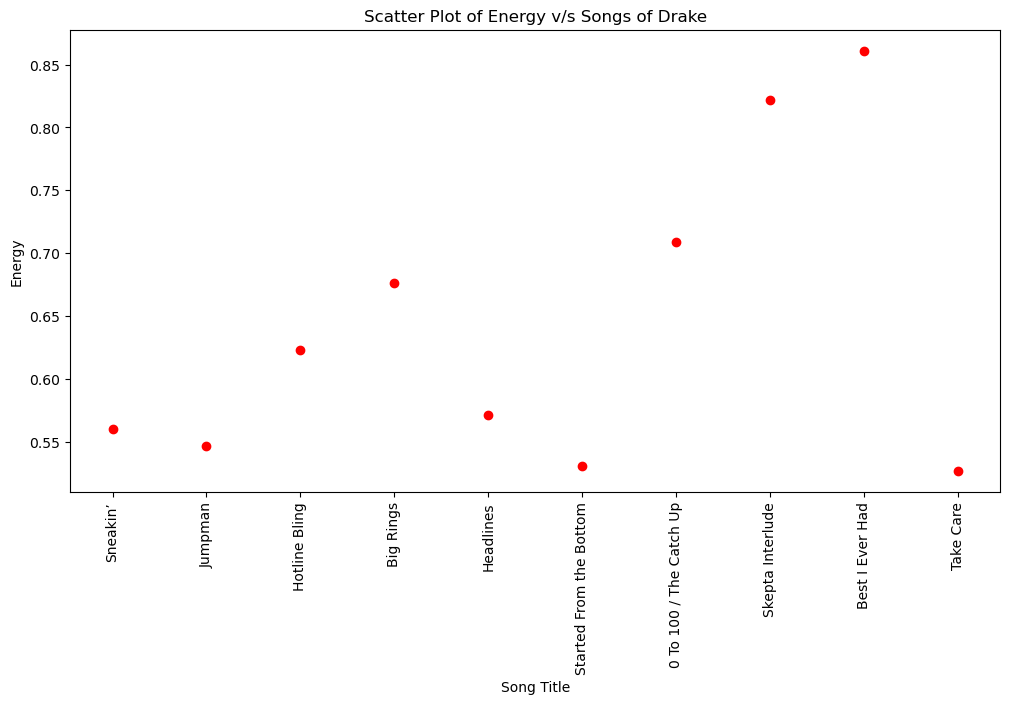

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(Drake['song_title'],Drake['energy'], alpha=1,color='red')
plt.xticks(rotation=90)
plt.xlabel('Song Title')
plt.ylabel('Energy')
plt.title('Scatter Plot of Energy v/s Songs of Drake')
plt.show()


Text(0.5, 1.0, 'Hisogram plot')

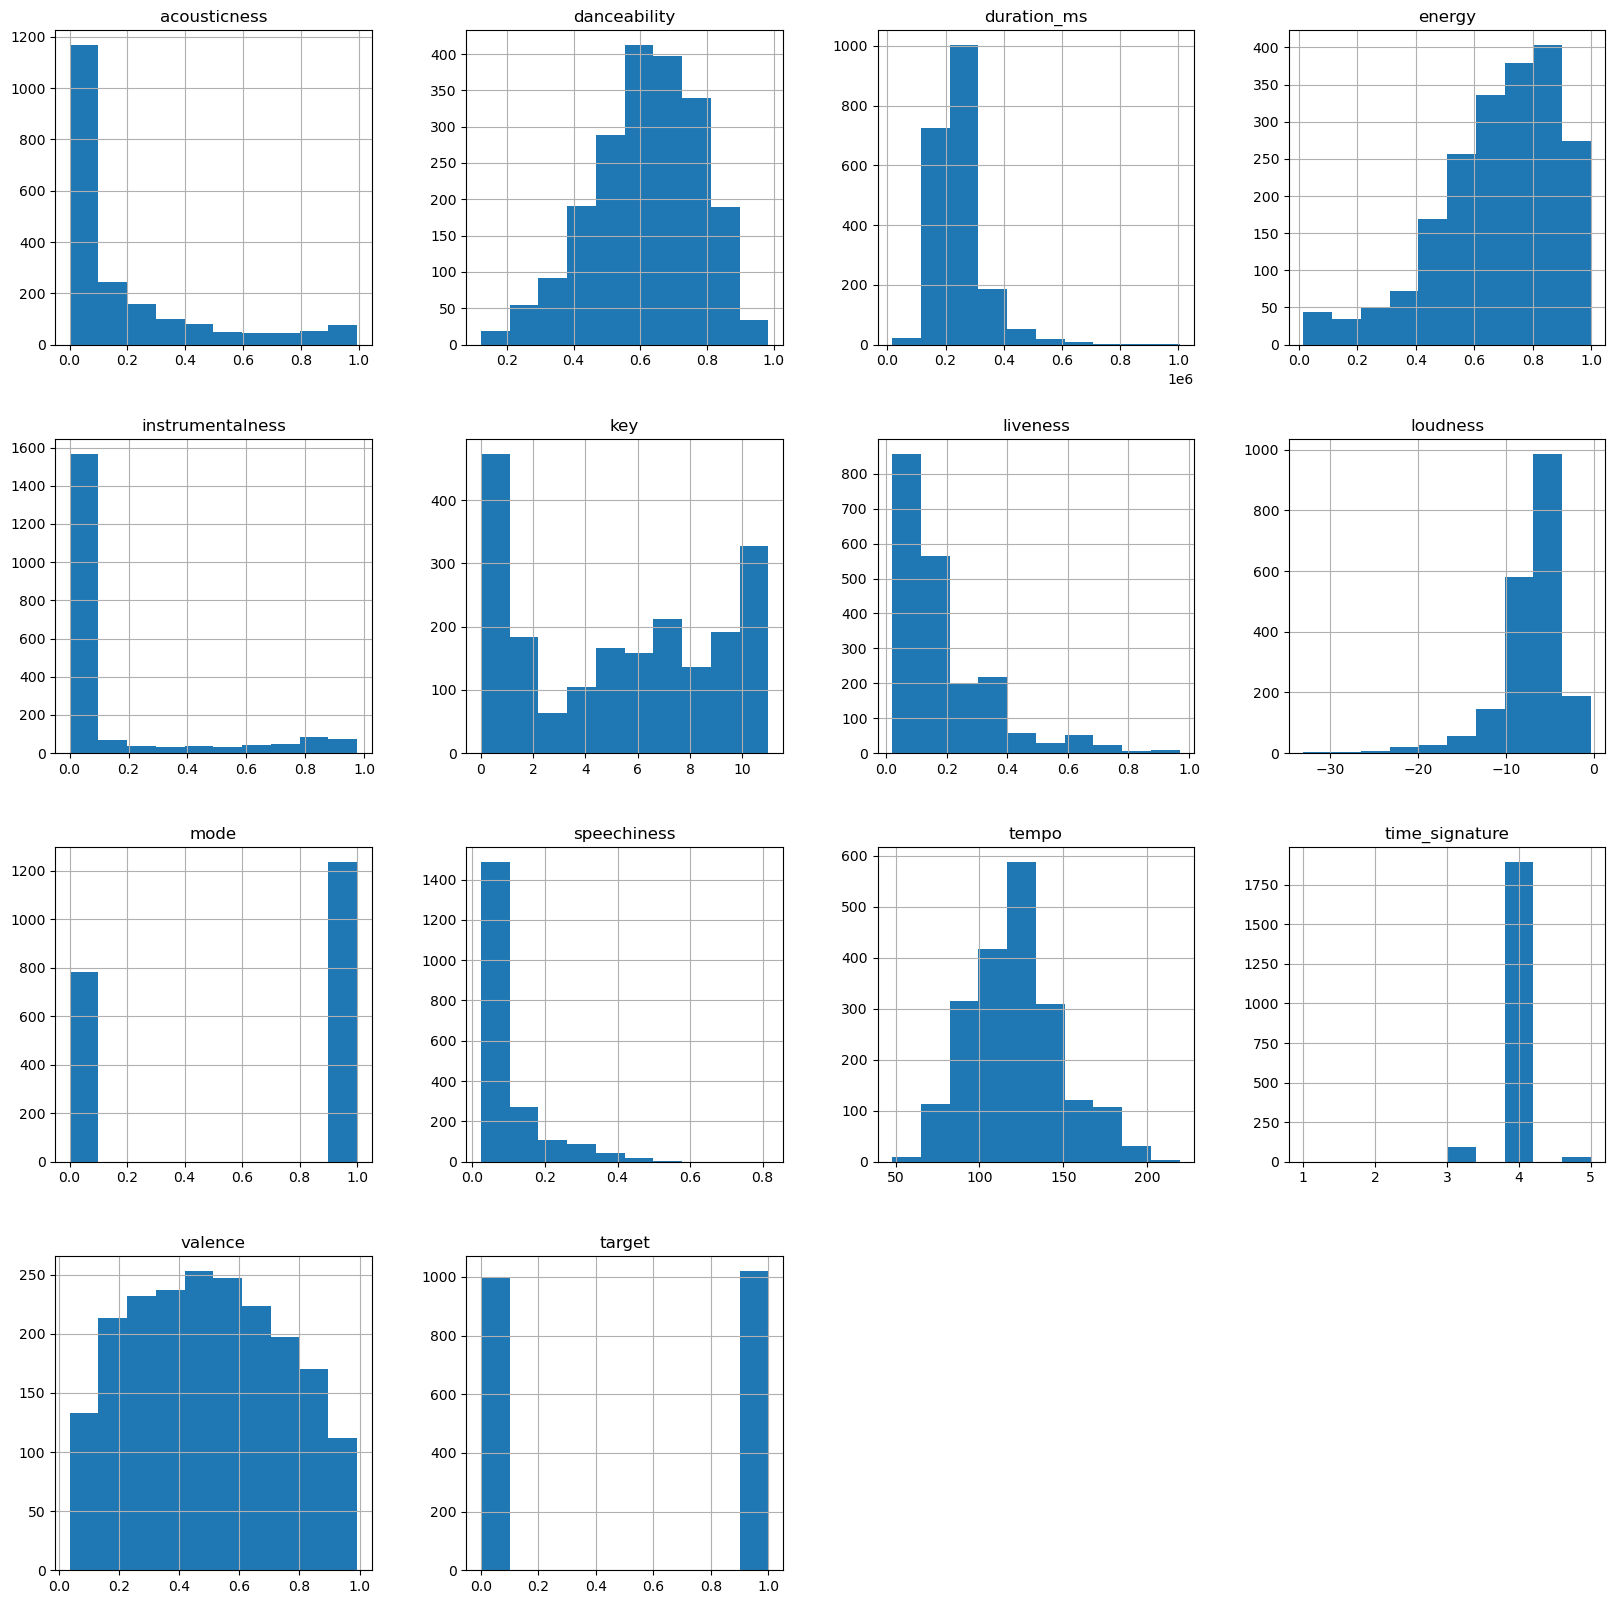

In [43]:
df.hist(figsize=(20,20))
plt.title("Hisogram plot", size=15, weight='bold')


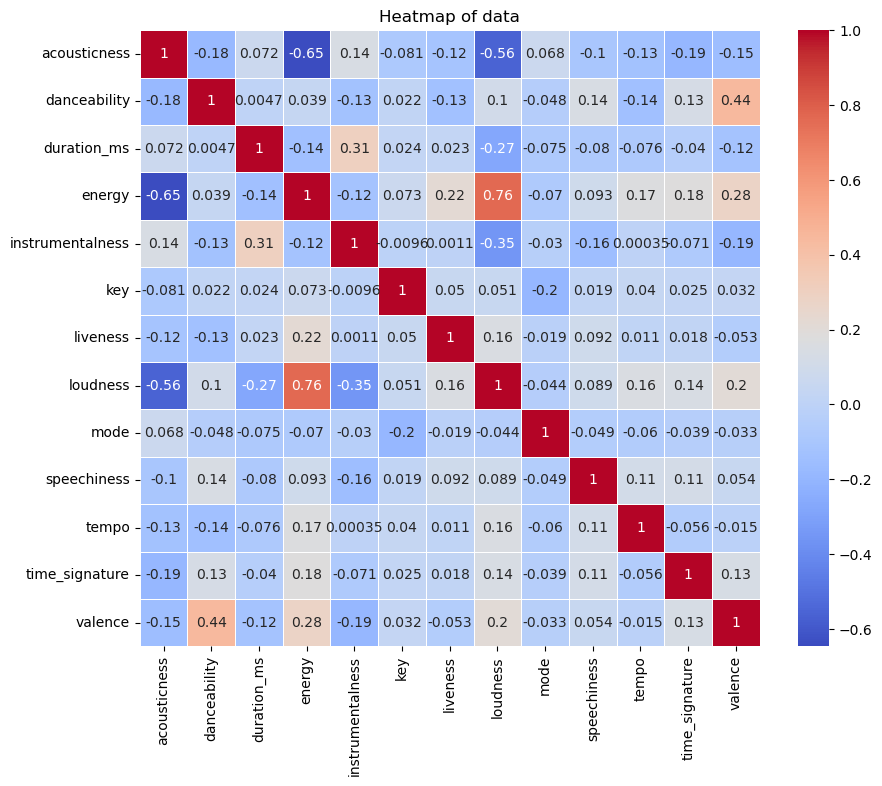

In [50]:
data = df[['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'mode',           'speechiness', 'tempo', 'time_signature', 'valence']]
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of data')
plt.show()